<a href="https://colab.research.google.com/github/zzoeys/freecakefridays/blob/main/Precinct_Polling_Sites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install descartes
!pip install geopandas
!pip install matplotlib
!pip install numpy
!pip install pandas

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 15.4 MB 52.8 MB/s 
     |████████████████████████████████| 6.3 MB 64.4 MB/s 


In [14]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
poll = pd.read_csv('/content/clean_precincts_with_polling_site.csv')
poll.id=poll['id'].str.slice(start=-11)
poll.head()

,Unnamed: 0,Area Name,id,Total,Hispanic,White,Black,Asian,Mixed,Others,Population Density: Hispanic,Population Density: White,Population Density: Black,Population Density: Asian,Population Density: Mixed,Population Density: Others,Polling Site
0,0,"2, Appling County, Georgia",13001000002,3563.0,403.0,1215.0,1838.0,10.0,81.0,16.0,0.113107,0.341005,0.515857,0.002807,0.022734,0.004491,1
1,1,"1B, Appling County, Georgia",1300100001B,1834.0,76.0,1575.0,109.0,3.0,63.0,8.0,0.041439,0.858779,0.059433,0.001636,0.034351,0.004362,1
2,2,"1C, Appling County, Georgia",1300100001C,1538.0,116.0,1242.0,150.0,5.0,25.0,0.0,0.075423,0.807542,0.097529,0.003251,0.016255,0.000000,1
3,3,"3C, Appling County, Georgia",1300100003C,2515.0,263.0,1528.0,608.0,39.0,69.0,8.0,0.104573,0.607555,0.241750,0.015507,0.027435,0.003181,1
4,4,"4B, Appling County, Georgia",1300100004B,1321.0,62.0,1147.0,59.0,5.0,43.0,5.0,0.046934,0.868282,0.044663,0.003785,0.032551,0.003785,1


In [16]:
geoData = "/content/cb_2020_13_vtd_500k.shp"
precinct = gpd.read_file(geoData)
precinct

,STATEFP20,COUNTYFP20,VTDST20,AFFGEOID20,GEOID20,VTDI20,NAME20,NAMELSAD20,LSAD20,ALAND20,AWATER20,geometry
0,13,089,0000MN,7000000US130890000MN,130890000MN,A,Memorial South,Memorial South,00,2870732,0,"POLYGON ((-84.23640 33.79579, -84.22852 33.795..."
1,13,015,000016,7000000US13015000016,13015000016,A,ZENA DRIVE,ZENA DRIVE,00,34588806,109680,"MULTIPOLYGON (((-84.77603 34.18687, -84.77592 ..."
2,13,121,0SS13A,7000000US131210SS13A,131210SS13A,A,SS13A,SS13A,00,1380349,4961,"POLYGON ((-84.38070 33.88620, -84.38077 33.887..."
3,13,097,000733,7000000US13097000733,13097000733,A,ARBOR STATION,ARBOR STATION,00,4737675,0,"POLYGON ((-84.76529 33.71717, -84.76474 33.718..."
4,13,063,00RD02,7000000US1306300RD02,1306300RD02,A,RIVERDALE 2,RIVERDALE 2,00,3543893,121558,"POLYGON ((-84.43945 33.55072, -84.43184 33.550..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2693,13,297,000423,7000000US13297000423,13297000423,A,BROKEN ARROW,BROKEN ARROW,00,37330235,182413,"POLYGON ((-83.91749 33.75357, -83.91499 33.755..."
2694,13,051,03-15C,7000000US1305103-15C,1305103-15C,A,ELI WHITNEY COMPLEX,ELI WHITNEY COMPLEX,00,9453851,1741591,"POLYGON ((-81.05333 32.07291, -81.05079 32.077..."
2695,13,195,000HUL,7000000US13195000HUL,13195000HUL,A,HULL,HULL,00,55981132,628672,"POLYGON ((-83.35848 34.04162, -83.35655 34.042..."
2696,13,141,00001A,7000000US1314100001A,1314100001A,A,DEVEREUX FIRE STATION,DEVEREUX FIRE STATION,00,157090464,6809617,"POLYGON ((-83.27522 33.19132, -83.27413 33.196..."


In [17]:
complete = precinct.merge(poll, how='left', left_on='GEOID20', right_on='id')
complete.head()

,STATEFP20,COUNTYFP20,VTDST20,AFFGEOID20,GEOID20,VTDI20,NAME20,NAMELSAD20,LSAD20,ALAND20,AWATER20,geometry,Unnamed: 0,Area Name,id,Total,Hispanic,White,Black,Asian,Mixed,Others,Population Density: Hispanic,Population Density: White,Population Density: Black,Population Density: Asian,Population Density: Mixed,Population Density: Others,Polling Site
0,13,089,0000MN,7000000US130890000MN,130890000MN,A,Memorial South,Memorial South,00,2870732,0,"POLYGON ((-84.23640 33.79579, -84.22852 33.795...",868,"Memorial South, DeKalb County, Georgia",130890000MN,4773.0,206.0,218.0,3933.0,252.0,130.0,34.0,0.043159,0.045674,0.824010,0.052797,0.027237,0.007123,0
1,13,015,000016,7000000US13015000016,13015000016,A,ZENA DRIVE,ZENA DRIVE,00,34588806,109680,"MULTIPOLYGON (((-84.77603 34.18687, -84.77592 ...",76,"ZENA DRIVE, Bartow County, Georgia",13015000016,10158.0,1248.0,6028.0,2152.0,221.0,432.0,77.0,0.122859,0.593424,0.211853,0.021756,0.042528,0.007580,1
2,13,121,0SS13A,7000000US131210SS13A,131210SS13A,A,SS13A,SS13A,00,1380349,4961,"POLYGON ((-84.38070 33.88620, -84.38077 33.887...",1540,"SS13A, Fulton County, Georgia",131210SS13A,3260.0,790.0,1849.0,387.0,146.0,71.0,17.0,0.242331,0.567178,0.118712,0.044785,0.021779,0.005215,1
3,13,097,000733,7000000US13097000733,13097000733,A,ARBOR STATION,ARBOR STATION,00,4737675,0,"POLYGON ((-84.76529 33.71717, -84.76474 33.718...",1004,"ARBOR STATION, Douglas County, Georgia",13097000733,4359.0,534.0,1316.0,2163.0,96.0,184.0,66.0,0.122505,0.301904,0.496215,0.022023,0.042212,0.015141,1
4,13,063,00RD02,7000000US1306300RD02,1306300RD02,A,RIVERDALE 2,RIVERDALE 2,00,3543893,121558,"POLYGON ((-84.43945 33.55072, -84.43184 33.550...",468,"RIVERDALE 2, Clayton County, Georgia",1306300RD02,5449.0,962.0,162.0,4124.0,64.0,104.0,33.0,0.176546,0.029730,0.756836,0.011745,0.019086,0.006056,1


In [18]:
def calculate_center(df):

    original_crs = complete.crs
    planar_crs = 'EPSG:3857'
    return complete['geometry'].to_crs(planar_crs).centroid.to_crs(original_crs)

complete["center"] = calculate_center(complete)

complete.head()

,STATEFP20,COUNTYFP20,VTDST20,AFFGEOID20,GEOID20,VTDI20,NAME20,NAMELSAD20,LSAD20,ALAND20,AWATER20,geometry,Unnamed: 0,Area Name,id,Total,Hispanic,White,Black,Asian,Mixed,Others,Population Density: Hispanic,Population Density: White,Population Density: Black,Population Density: Asian,Population Density: Mixed,Population Density: Others,Polling Site,center
0,13,089,0000MN,7000000US130890000MN,130890000MN,A,Memorial South,Memorial South,00,2870732,0,"POLYGON ((-84.23640 33.79579, -84.22852 33.795...",868,"Memorial South, DeKalb County, Georgia",130890000MN,4773.0,206.0,218.0,3933.0,252.0,130.0,34.0,0.043159,0.045674,0.824010,0.052797,0.027237,0.007123,0,POINT (-84.22192 33.79289)
1,13,015,000016,7000000US13015000016,13015000016,A,ZENA DRIVE,ZENA DRIVE,00,34588806,109680,"MULTIPOLYGON (((-84.77603 34.18687, -84.77592 ...",76,"ZENA DRIVE, Bartow County, Georgia",13015000016,10158.0,1248.0,6028.0,2152.0,221.0,432.0,77.0,0.122859,0.593424,0.211853,0.021756,0.042528,0.007580,1,POINT (-84.78113 34.20829)
2,13,121,0SS13A,7000000US131210SS13A,131210SS13A,A,SS13A,SS13A,00,1380349,4961,"POLYGON ((-84.38070 33.88620, -84.38077 33.887...",1540,"SS13A, Fulton County, Georgia",131210SS13A,3260.0,790.0,1849.0,387.0,146.0,71.0,17.0,0.242331,0.567178,0.118712,0.044785,0.021779,0.005215,1,POINT (-84.37490 33.88789)
3,13,097,000733,7000000US13097000733,13097000733,A,ARBOR STATION,ARBOR STATION,00,4737675,0,"POLYGON ((-84.76529 33.71717, -84.76474 33.718...",1004,"ARBOR STATION, Douglas County, Georgia",13097000733,4359.0,534.0,1316.0,2163.0,96.0,184.0,66.0,0.122505,0.301904,0.496215,0.022023,0.042212,0.015141,1,POINT (-84.74940 33.72112)
4,13,063,00RD02,7000000US1306300RD02,1306300RD02,A,RIVERDALE 2,RIVERDALE 2,00,3543893,121558,"POLYGON ((-84.43945 33.55072, -84.43184 33.550...",468,"RIVERDALE 2, Clayton County, Georgia",1306300RD02,5449.0,962.0,162.0,4124.0,64.0,104.0,33.0,0.176546,0.029730,0.756836,0.011745,0.019086,0.006056,1,POINT (-84.42763 33.53465)


In [19]:
bubble = complete.drop(columns=["geometry"]).rename(columns={"center": "geometry"})
bubble.head()

,STATEFP20,COUNTYFP20,VTDST20,AFFGEOID20,GEOID20,VTDI20,NAME20,NAMELSAD20,LSAD20,ALAND20,AWATER20,Unnamed: 0,Area Name,id,Total,Hispanic,White,Black,Asian,Mixed,Others,Population Density: Hispanic,Population Density: White,Population Density: Black,Population Density: Asian,Population Density: Mixed,Population Density: Others,Polling Site,geometry
0,13,089,0000MN,7000000US130890000MN,130890000MN,A,Memorial South,Memorial South,00,2870732,0,868,"Memorial South, DeKalb County, Georgia",130890000MN,4773.0,206.0,218.0,3933.0,252.0,130.0,34.0,0.043159,0.045674,0.824010,0.052797,0.027237,0.007123,0,POINT (-84.22192 33.79289)
1,13,015,000016,7000000US13015000016,13015000016,A,ZENA DRIVE,ZENA DRIVE,00,34588806,109680,76,"ZENA DRIVE, Bartow County, Georgia",13015000016,10158.0,1248.0,6028.0,2152.0,221.0,432.0,77.0,0.122859,0.593424,0.211853,0.021756,0.042528,0.007580,1,POINT (-84.78113 34.20829)
2,13,121,0SS13A,7000000US131210SS13A,131210SS13A,A,SS13A,SS13A,00,1380349,4961,1540,"SS13A, Fulton County, Georgia",131210SS13A,3260.0,790.0,1849.0,387.0,146.0,71.0,17.0,0.242331,0.567178,0.118712,0.044785,0.021779,0.005215,1,POINT (-84.37490 33.88789)
3,13,097,000733,7000000US13097000733,13097000733,A,ARBOR STATION,ARBOR STATION,00,4737675,0,1004,"ARBOR STATION, Douglas County, Georgia",13097000733,4359.0,534.0,1316.0,2163.0,96.0,184.0,66.0,0.122505,0.301904,0.496215,0.022023,0.042212,0.015141,1,POINT (-84.74940 33.72112)
4,13,063,00RD02,7000000US1306300RD02,1306300RD02,A,RIVERDALE 2,RIVERDALE 2,00,3543893,121558,468,"RIVERDALE 2, Clayton County, Georgia",1306300RD02,5449.0,962.0,162.0,4124.0,64.0,104.0,33.0,0.176546,0.029730,0.756836,0.011745,0.019086,0.006056,1,POINT (-84.42763 33.53465)


In [20]:
redblue = sns.diverging_palette(10, 240, center='light', as_cmap=True)

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:645: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


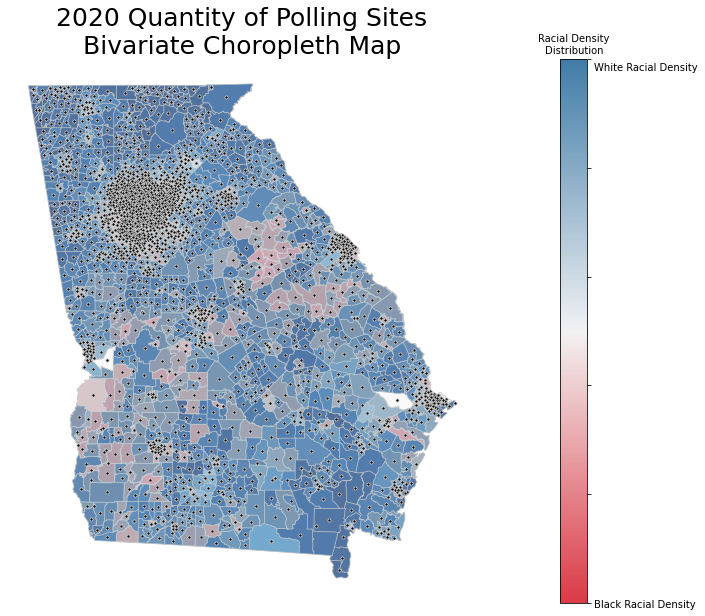

In [21]:
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
ax.set_title('2020 Quantity of Polling Sites\nBivariate Choropleth Map', fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap=redblue)
colorbar=fig.colorbar(sm)
colorbar.ax.set_title('Racial Density\nDistribution',fontsize=10)
colorbar.ax.set_yticklabels(['Black Racial Density', '', '', '', '', '\nWhite Racial Density'])
complete.plot(column='Population Density: Black', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=1)
complete.plot(column='Population Density: White', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=0.7)
bubble.plot(column='Polling Site', marker='o', color='black', markersize=10, linewidth=0.8, ax=ax, edgecolor='0.8')

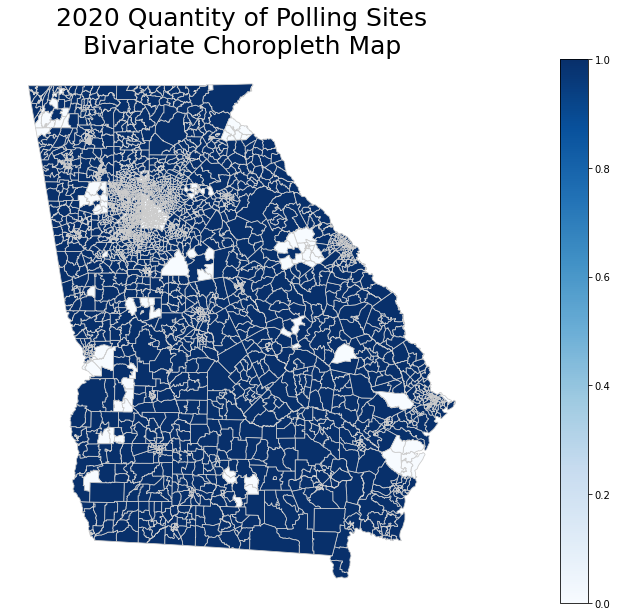

In [22]:
fig, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
ax.set_title('2020 Quantity of Polling Sites\nBivariate Choropleth Map', fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='Blues')
colorbar=fig.colorbar(sm)
complete.plot(column='Polling Site', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=1)